### 생선 분류(이진 분류 - 도미 또는 빙어)
* 도미 - 35
* 빙어 - 14
데이터 불균형

### 1. 도미 데이터 준비

In [1]:
import pandas as pd
import numpy as np

In [2]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [3]:
len(bream_length)

35

### 2. 빙어 데이터 준비

In [4]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [5]:
len(smelt_length)

14

### 3. 시각화

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

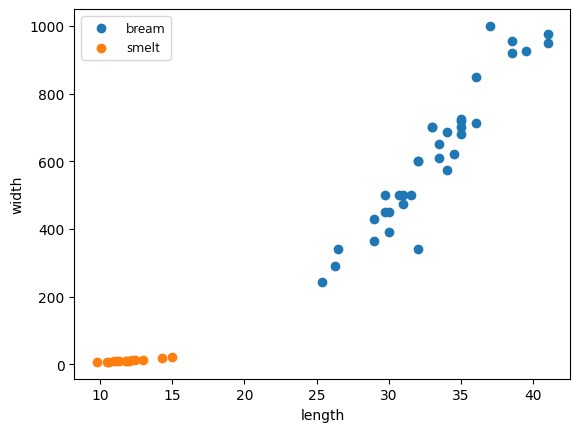

In [7]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)

plt.xlabel('length')
plt.ylabel('width')
plt.rc("font", family="Malgun Gothic")
plt.legend(['bream','smelt'])
plt.show()#분포 출력

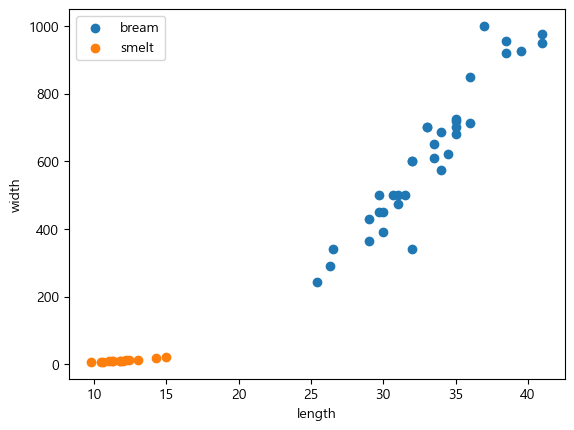

In [8]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)

plt.xlabel('length')
plt.ylabel('width')
plt.rc("font", family="Malgun Gothic")
plt.legend(['bream','smelt'])
plt.show()#분포 출력

### 4. 데이터 합치기

In [9]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight
len(length)
len(weight)

49

### 5. 2차원 입력 데이터 만들기 - 훈련 데이터는 무조건  2차원

In [10]:
list(zip(length,weight))

[(25.4, 242.0),
 (26.3, 290.0),
 (26.5, 340.0),
 (29.0, 363.0),
 (29.0, 430.0),
 (29.7, 450.0),
 (29.7, 500.0),
 (30.0, 390.0),
 (30.0, 450.0),
 (30.7, 500.0),
 (31.0, 475.0),
 (31.0, 500.0),
 (31.5, 500.0),
 (32.0, 340.0),
 (32.0, 600.0),
 (32.0, 600.0),
 (33.0, 700.0),
 (33.0, 700.0),
 (33.5, 610.0),
 (33.5, 650.0),
 (34.0, 575.0),
 (34.0, 685.0),
 (34.5, 620.0),
 (35.0, 680.0),
 (35.0, 700.0),
 (35.0, 725.0),
 (35.0, 720.0),
 (36.0, 714.0),
 (36.0, 850.0),
 (37.0, 1000.0),
 (38.5, 920.0),
 (38.5, 955.0),
 (39.5, 925.0),
 (41.0, 975.0),
 (41.0, 950.0),
 (9.8, 6.7),
 (10.5, 7.5),
 (10.6, 7.0),
 (11.0, 9.7),
 (11.2, 9.8),
 (11.3, 8.7),
 (11.8, 10.0),
 (11.8, 9.9),
 (12.0, 9.8),
 (12.2, 12.2),
 (12.4, 13.4),
 (13.0, 12.2),
 (14.3, 19.7),
 (15.0, 19.9)]

In [11]:
fish_data=[[l,w] for l,w in zip(length,weight)]
fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

### 6. 레이블(label , target) 만들기
* 도미: 1
* 빙어: 0

In [12]:
fish_target=[1]*35 + [0]*14
fish_target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

### 7.데이터를 쉽게 이해하기 위해 df로 변경한다.

In [13]:
df=pd.DataFrame(fish_data)
df.columns=['length','width']
df['target']=fish_target
df

,length,width,target
0,25.4,242.0,1
1,26.3,290.0,1
2,26.5,340.0,1
3,29.0,363.0,1
4,29.0,430.0,1
5,29.7,450.0,1
6,29.7,500.0,1
7,30.0,390.0,1
8,30.0,450.0,1
9,30.7,500.0,1


###  8. 데이터 분리 train_test_split 함수 사용

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
fish_data = np.array(fish_data)
fish_target = np.array(fish_target)
# train_test_split(입력데이터, 타겟)
#  stratify 는 불균형 데이터 경우에 균형있게 자동으로 분리해준다. stratify=fish_target
X_train, X_test, y_train, y_test=train_test_split(fish_data, fish_target, test_size=0.2, random_state=1,stratify=fish_target)

In [23]:
# 총 49개중에 39개가 훈련 데이터
X_train.shape,  y_train.shape

((39, 2), (39,))

In [24]:
X_test.shape,  y_test.shape

((10, 2), (10,))

### shuffle 어느 정도인지 시각화 

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

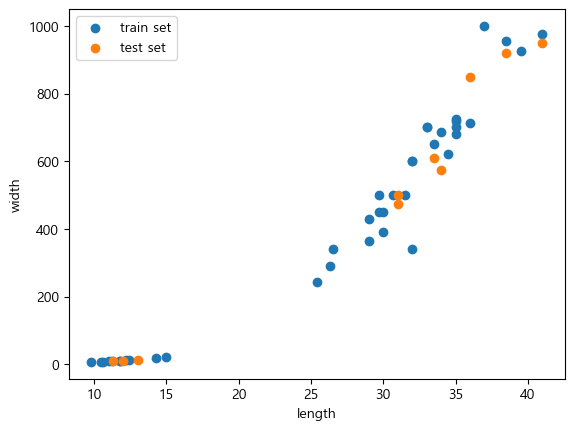

In [27]:
plt.scatter(X_train[:,0], X_train[:,1])#훈련 데이터 (길이, 무게 )
plt.scatter(X_test[:,0], X_test[:,1]) #테스트 데이터(길이, 무게)
plt.xlabel("length")
plt.ylabel("width")
plt.legend(["train set","test set"])
plt.show()

### 8. 모델 생성 및 훈련

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
kn = KNeighborsClassifier()
# kn.fit(fish_data, fish_target)
kn.fit(X_train, y_train) #훈련 데이터로 훈련

KNeighborsClassifier()

### 9. 예측

In [32]:
#pred = kn.predict(fish_data)
pred = kn.predict(X_test)
pred


array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0])

### 10. 평가
* 모델 자체에 있는 score 함수 사용 : kn.score(데이터, 타겟) ==> 입력된 데이터를 predict로 예측하고 

* accurancy_score 함수 사용 : accuracy_score(타겟, pred값)==> 타겟과 pred값 비교

In [33]:
# kn.score(fish_data, fish_target)
kn.score(X_test, y_test)

1.0

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
# accuracy_score(fish_target, pred)
accuracy_score(y_test, pred)

1.0